In [121]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
pip install scikit-learn==1.2.2

In [123]:
#Loading the dataset
data = pd.read_csv ("/content/brain_stroke.csv")

In [124]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [125]:
data.shape

(4981, 11)

In [126]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [127]:
data.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [128]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Data Correlation

In [129]:
data_encoded = pd.get_dummies(data, drop_first=True)


In [130]:
correlation_matrix = data_encoded.corr()

<Axes: >

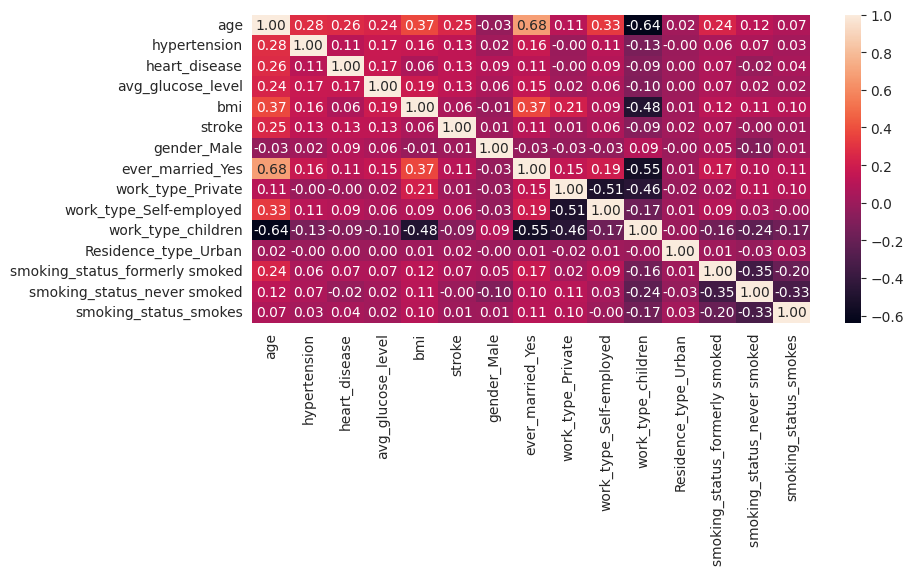

In [131]:
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

Outlier Removal

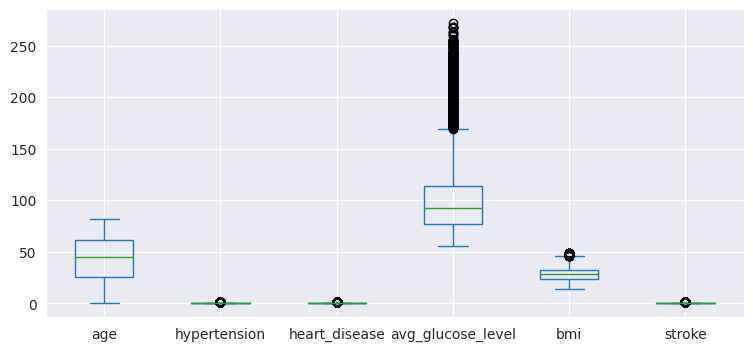

In [132]:
# Set the seaborn style
sns.set_style("darkgrid")

# Set the figure size
plt.rcParams['figure.figsize'] = (9, 4)

# Create a box plot
data.plot(kind='box')

# Show the plot
plt.show()

In [133]:
data['avg_glucose_level'].describe()

,avg_glucose_level
count,4981.000000
mean,105.943562
std,45.075373
min,55.120000
25%,77.230000
50%,91.850000
75%,113.860000
max,271.740000


In [134]:
outliers = data[data['avg_glucose_level'] > 118.60]

# Display the outliers
print(outliers)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
9     Female  61.0             0              1          Yes       Govt_job   
...      ...   ...           ...            ...          ...            ...   
4968  Female  78.0             1              1          Yes        Private   
4970  Female  70.0             0              1          Yes  Self-employed   
4972    Male  72.0             0              1          Yes        Private   
4975    Male  31.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi   smok

Label Encoder


In [135]:
from sklearn.preprocessing import LabelEncoder

# Initializing separate LabelEncoders for each categorical column
enc_work_type = LabelEncoder()
enc_gender = LabelEncoder()
enc_smoking_status = LabelEncoder()
enc_residence_type = LabelEncoder()
enc_ever_married = LabelEncoder()

# Encoding the columns
data['work_type'] = enc_work_type.fit_transform(data['work_type'])
data['gender'] = enc_gender.fit_transform(data['gender'])
data['smoking_status'] = enc_smoking_status.fit_transform(data['smoking_status'])
data['Residence_type'] = enc_residence_type.fit_transform(data['Residence_type'])
data['ever_married'] = enc_ever_married.fit_transform(data['ever_married'])

# The columns are already updated in the DataFrame
print(data)


      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0              

In [136]:
# Print the DataFrame to see the encoded values
print(data)

# Optional: Print the classes learned by each encoder
print("work_type classes:", enc_work_type.classes_)
print("gender classes:", enc_gender.classes_)
print("smoking_status classes:", enc_smoking_status.classes_)
print("Residence_type classes:", enc_residence_type.classes_)
print("ever_married classes:", enc_ever_married.classes_)


      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          1   
1          1  80.0             0              1             1          1   
2          0  49.0             0              0             1          1   
3          0  79.0             1              0             1          2   
4          1  81.0             0              0             1          1   
...      ...   ...           ...            ...           ...        ...   
4976       1  41.0             0              0             0          1   
4977       1  40.0             0              0             1          1   
4978       0  45.0             1              0             1          0   
4979       1  40.0             0              0             1          1   
4980       0  80.0             1              0             1          1   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0              

Splitting The Data

In [137]:
# Import necessary library
from sklearn.model_selection import train_test_split


In [138]:
X = data.drop('stroke', axis=1)  # Features: drop the target column
y = data['stroke']

In [139]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2
2,0,49.0,0,0,1,1,1,171.23,34.4,3
3,0,79.0,1,0,1,2,0,174.12,24.0,2
4,1,81.0,0,0,1,1,1,186.21,29.0,1


In [140]:
Y=data['stroke']
Y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
4976,0
4977,0
4978,0
4979,0


Train_Test_Split

In [141]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets, 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=101,
    stratify=y
)

# Display the shape of the datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3984, 10)
X_test shape: (997, 10)
y_train shape: (3984,)
y_test shape: (997,)


In [142]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4348,1,21.0,0,0,0,1,0,92.87,28.4,3
301,0,25.0,0,0,0,1,0,66.30,27.2,2
3407,1,58.0,0,0,1,1,0,96.01,33.8,0
2433,0,53.0,0,0,1,0,0,87.62,33.7,3
1163,1,67.0,0,0,1,1,0,113.34,26.3,1


In [143]:
y_train.head()

,stroke
4348,0
301,0
3407,0
2433,0
1163,0


In [144]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2260,0,73.0,0,0,1,2,1,87.56,24.1,2
192,0,73.0,0,0,1,2,1,70.94,34.4,2
4245,0,17.0,0,0,0,1,0,79.62,21.6,2
1551,0,50.0,0,0,1,2,1,85.92,37.3,3
4462,1,42.0,0,0,1,0,1,58.35,24.3,2


In [145]:
y_test.head()

,stroke
2260,0
192,1
4245,0
1551,0
4462,0


In [146]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


Standerdization


In [147]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
std = StandardScaler()


In [148]:
# Standardize the training and testing data
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

# Counting the number of stroke and no-stroke cases in the training data
y_train.value_counts()


,count
stroke,
0,3786
1,198


In [149]:
X_train_std

array([[ 1.16807178, -0.98365808, -0.32518489, ..., -0.28815758,
        -0.01589207,  1.52739252],
       [-0.85611177, -0.80807183, -0.32518489, ..., -0.87965747,
        -0.19180499,  0.59150636],
       [ 1.16807178,  0.64051477, -0.32518489, ..., -0.21825507,
         0.77571609, -1.28026596],
       ...,
       [-0.85611177,  0.46492851, -0.32518489, ..., -0.26055277,
         0.01342675, -0.3443798 ],
       [ 1.16807178,  0.46492851, -0.32518489, ..., -0.39991255,
         0.37991201,  1.52739252],
       [ 1.16807178,  1.47454947, -0.32518489, ..., -1.00276603,
        -0.80750023,  1.52739252]])

In [150]:
X_test_std

array([[-0.85611177,  1.29896322, -0.32518489, ..., -0.40636851,
        -0.64624671,  0.59150636],
       [-0.85611177,  1.29896322, -0.32518489, ..., -0.77636204,
         0.86367256,  0.59150636],
       [-0.85611177, -1.15924434, -0.32518489, ..., -0.58312836,
        -1.01273197,  0.59150636],
       ...,
       [ 1.16807178, -0.06183025, -0.32518489, ...,  0.10832767,
         0.57048435, -0.3443798 ],
       [-0.85611177, -1.29093403, -0.32518489, ..., -0.62987844,
        -0.96875374,  0.59150636],
       [-0.85611177,  0.06985944, -0.32518489, ...,  0.10365266,
        -0.55829025,  1.52739252]])

<Axes: xlabel='stroke', ylabel='count'>

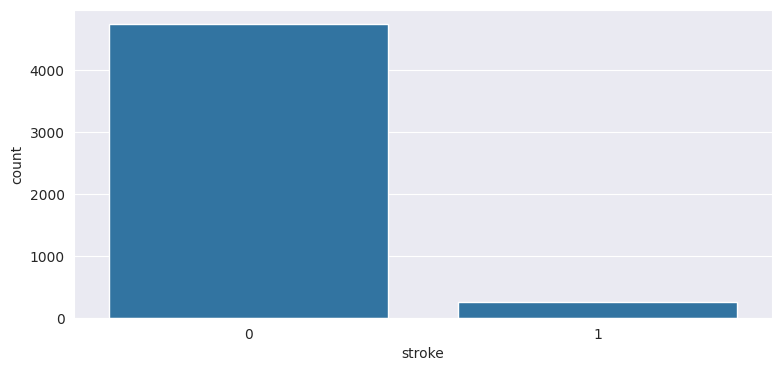

In [151]:
# Plotting the number of stroke and no-stroke cases
sns.countplot(x='stroke', data=data)

In [152]:
# Counting the number of stroke and no-stroke cases
data['stroke'].value_counts()


,count
stroke,
0,4733
1,248


In [153]:
pip install imbalanced-learn


In [154]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE


In [155]:
from imblearn.combine import SMOTETomek

# Initialize SMOTETomek
st = SMOTETomek()

# Fit and resample the training data
X_train_re, y_train_re = st.fit_resample(X_train_std, y_train)


Random Forest Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()


In [157]:
# Fit the model to the resampled training data
rf.fit(X_train_re, y_train_re)


RandomForestClassifier()

In [158]:
Y_pred = rf.predict(X_test_std)

In [159]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [161]:
# Make predictions on the test data
y_pred = rf.predict(X_test_std)

# Calculate accuracy score
ac_rf = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy Score:", ac_rf)

Accuracy Score: 0.9237713139418254


In [162]:
def prediction(a, b, c, d, e, f, g, h, i, j):
    # Create a DataFrame or array with the input values
    input_data = [[a, b, c, d, e, f, g, h, i, j]]

    # Make the prediction
    result = rf.predict(input_data)

    # Print the result based on the prediction
    if result[0] == 1:
        print("You are at risk of stroke\n")
    else:
        print("You are not at risk of stroke\n")

# Define the mappings for categorical variables
# Male=1, Female=0
# Yes=1, No=0
# Govt job=0, Private=1, Self_employed=2, Children=3
# Urban=1, Rural=0
# Unknown=0, Formerly_smoked=1, Never_smoked=2, Smokes=3

# Example usage:
# prediction(1, 0, 2, 1, 0, 1, 0, 2, 1, 0)


In [163]:
from sklearn.metrics import classification_report

In [164]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = rf.predict(X_test_std)

# Calculate accuracy score
ac_rf = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy Score:", ac_rf)

Accuracy Score: 0.9237713139418254


In [166]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = rf.predict(X_test_std)

# Calculate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       947
           1       0.23      0.22      0.22        50

    accuracy                           0.92       997
   macro avg       0.59      0.59      0.59       997
weighted avg       0.92      0.92      0.92       997



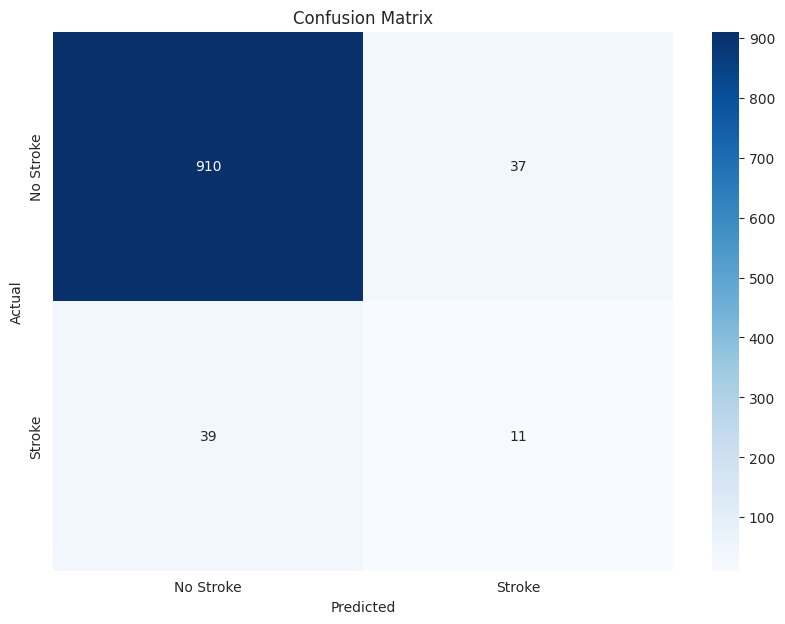

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [168]:
import pickle as pkl

# Define the path where you want to save the model
path = "brain_model.sav"

# Save the trained RandomForest model to the file
with open(path, "wb") as file:
    pkl.dump(rf, file)

print("Model saved to", path)


Model saved to brain_model.sav
